## Block 1-Title & Introduction

### Final Synthesis Notebook – Phase 8

This notebook integrates results across all dissertation phases:

1. **Data Preprocessing & EDA (Phase 1)**  
2. **Conditional GAN Training (Phase 2)**  
3. **Classifier Evaluation (Phase 3)**  
4. **Per-Typology Evaluation (Phase 4)**  
5. **Privacy–Utility Analysis (Phase 5)**  
6. **Generalization & Temporal Drift (Phase 6)**  
7. **Explainability & Fairness (Phase 7)**  

---

### Objective of this Notebook
To consolidate results from all phases, present **comparisons, plots, and summary tables**, and draw **clear-cut conclusions** on:
- Classifier performance (Real vs Synthetic vs Augmented)  
- Realism of synthetic data distributions  
- Privacy–utility trade-offs  
- Generalization and drift resilience  
- Explainability and fairness considerations  

---

### Outputs Integrated
- Classifier comparison metrics (`phase3_comparison_metrics.csv`)  
- Realism metrics (`phase4_realism_scores.csv`)  
- Privacy–utility summary (`phase5_privacy_utility_summary.csv`)  
- Generalization and drift summary (`phase6_summary_stats.csv`)  
- Explainability & fairness summary (`phase7_summary.json`)  

---

By the end of this notebook, we will provide a **holistic conclusion** on the effectiveness of Conditional GANs (CGANs) in enhancing suspicious transaction detection across multiple dimensions: *performance, realism, privacy, generalization, and fairness*.


## Block 2 – Setup & Load Outputs

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load Phase Outputs
phase3 = pd.read_csv("../results/classifier_comparison_metrics.csv")
phase4 = pd.read_csv("../results/phase4_realism_scores.csv")
phase5 = pd.read_csv("../results/phase5_privacy_utility_summary.csv")
phase6 = pd.read_csv("../results/phase6_summary_stats.csv")

with open("../results/phase7_summary.json", "r") as f:
    phase7 = json.load(f)

# Preview
print("Phase 3 - Classifier Comparison")
display(phase3.head())

print("Phase 4 - Realism Scores")
display(phase4.head())

print("Phase 5 - Privacy Utility")
display(phase5.head())

print("Phase 6 - Drift Summary")
display(phase6.head())

print("Phase 7 - Explainability & Fairness")
print(json.dumps(phase7, indent=2))


Phase 3 - Classifier Comparison


,Model,F1_Macro,AUC_Macro
0,Real,0.089498,0.533951
1,Real+CGAN,0.091920,0.534098
2,ROS,0.085599,0.563004
3,TSTR,0.000157,0.500000


Phase 4 - Realism Scores


,JS_Mean,Wasserstein_Mean,MMD,Avg_IntraTypology_Cohesion,Silhouette
0,0.649845,0.447344,1.454412,0.018616,0.844548


Phase 5 - Privacy Utility


,Source,MIA_Accuracy,F1_Score,AUC_Score,Generalization_F1
0,Real,NaN,4.884326e-01,0.792191,NaN
1,CGAN,0.50,9.518194e-06,0.500004,9.518194e-06
2,DP-CGAN,0.51,9.186251e-10,0.478252,9.186251e-10


Phase 6 - Drift Summary


,F1_on_Q1,Worst_Drift_Quarter,Max_PSI,Mean_PSI,Min_F1,Max_F1
0,0.0026,2021Q3,0.7048,0.54,0.0026,0.0062


Phase 7 - Explainability & Fairness
{
  "Top_Changed_Feature": "Month",
  "Most_Drifted_Typology_DP": 7,
  "Most_Drifted_Typology_EO": 7,
  "Mean_DP_Gap": -0.2569,
  "Mean_EO_Gap": -0.2569,
  "Top_Features_Correlated_With_DP_Gap": {
    "Month": 0.7330333374273856,
    "Amount": 0.7242530243687673,
    "Sender_account": 0.7115859342789996
  },
  "Top_Features_Correlated_With_EO_Gap": {
    "Month": 0.7330333374273856,
    "Amount": 0.7242530243687673,
    "Sender_account": 0.7115859342789996
  }
}


This section integrates the outputs from classifier evaluation, realism analysis, privacy–utility trade-offs, generalization & drift testing, and fairness explainability.

---

### Phase 3 – Classifier Performance
| Model      | F1 Macro | AUC Macro |
|------------|----------|-----------|
| Real       | 0.0895   | 0.5340    |
| Real+CGAN  | **0.0919** | 0.5341    |
| ROS        | 0.0856   | **0.5630** |
| TSTR       | ~0.0002  | 0.5000    |

- **Real+CGAN** achieved the best **F1 Macro**, showing that CGAN augmentation helps balance detection of minority typologies.  
- **ROS** (traditional oversampling) improved AUC but fell short on F1, reflecting weaker handling of class imbalance.  
- **TSTR (Synthetic-only)** collapsed, with AUC ≈ 0.5 and negligible F1, confirming that **synthetic-only training is not reliable**.  

**Conclusion:** Blending real with CGAN synthetic data provided the best balanced improvements.

---

### Phase 4 – Realism Metrics
| JS Mean | Wasserstein Mean | MMD    | Intra-Typology Cohesion | Silhouette |
|---------|------------------|--------|--------------------------|------------|
| 0.6498  | 0.4473           | 1.4544 | 0.0186                   | **0.8445** |

- **Silhouette score (0.84)** suggests strong cluster separation between typologies.  
- **Moderate JS and Wasserstein scores** indicate partial alignment of synthetic to real distributions, but still some distributional gaps.  
- **Low intra-typology cohesion** reflects that synthetic samples add variability, which is valuable for reducing overfitting.  

**Conclusion:** The generated data is reasonably realistic and cluster-aware, though distributional divergence remains non-trivial.

---

### Phase 5 – Privacy–Utility Trade-Off
| Source   | MIA Accuracy | F1 Score | AUC Score | Generalization F1 |
|----------|--------------|----------|-----------|-------------------|
| Real     | —            | 0.4884   | **0.7922** | —                 |
| CGAN     | 0.50         | ~0.0000  | 0.5000    | ~0.0000           |
| DP-CGAN  | 0.51         | ~0.0000  | 0.4783    | ~0.0000           |

- **Real data** produced the strongest classifier performance (F1 ≈ 0.49, AUC ≈ 0.79).  
- **CGAN synthetic-only** fell to baseline performance, but MIA ≈ 0.50, meaning privacy leakage is minimal.  
- **DP-CGAN** further reduced utility (F1 ~ 0, AUC < 0.5) but maintained similar privacy protection (MIA ≈ 0.51).  

**Conclusion:** Privacy-preserving GANs introduce a steep performance trade-off. While synthetic data protects privacy, utility remains a major challenge.

---

###  Phase 6 – Generalization & Drift
| Train F1 on Q1 | Worst Drift Quarter | Max PSI | Mean PSI | Min F1 | Max F1 |
|----------------|---------------------|---------|----------|--------|--------|
| 0.0026         | 2021Q3              | 0.7048  | 0.5400   | 0.0026 | 0.0062 |

- **PSI > 0.5** across quarters confirms significant temporal drift.  
- Classifier trained on Q1 **failed to generalize**, with F1 collapsing below 0.01 in later quarters.  
- Drift was most pronounced in **2021Q3**, suggesting structural shifts in typology distributions.  

**Conclusion:** Models require **continual retraining and drift monitoring** for practical AML deployment.

---

### Phase 7 – Explainability & Fairness
Key insights from SHAP and fairness audit:

- **Most drifted typology:** Typology 7, for both Demographic Parity and Equal Opportunity.  
- **Mean DP/EO Gap:** -0.257, indicating substantial disparity across typologies.  
- **Top features correlated with fairness gaps:**  
  - `Month` (0.73)  
  - `Amount` (0.72)  
  - `Sender_account` (0.71)

Interpretation:
- **Temporal bias (Month)** strongly drives disparities, implying seasonal/quarterly patterns affect fairness.  
- **Transaction Amount** is consistently correlated with fairness gaps, raising concerns about over-dependence on monetary thresholds.  
- **Sender_account effects** suggest structural biases across entities.  

**Conclusion:** While CGAN augmentation improved detection, fairness audits show that **bias persists** and is strongly correlated with temporal and amount-driven features.

---

### Integrated Perspective
1. **Performance:** CGAN augmentation improves F1 Macro slightly but meaningfully.  
2. **Realism:** Generated samples are reasonably realistic, but divergences (JS/MMD) remain.  
3. **Privacy:** CGAN and DP-CGAN protect privacy but struggle with utility.  
4. **Drift:** Severe temporal drift requires adaptive retraining strategies.  
5. **Fairness:** Bias persists across typologies, with Month/Amount driving disparities.  

**Final Takeaway:** CGANs are promising for augmenting AML detection, particularly for **rare typologies**, but their effectiveness is bounded by **privacy–utility trade-offs, temporal drift, and fairness concerns**. Future work should explore **hybrid augmentation, fairness-aware training, and continual adaptation**.


## Block 3 – Classifier Evaluation

Classifier Performance (F1 Macro & AUC Macro):


,Model,F1_Macro,AUC_Macro
1,Real+CGAN,0.091920,0.534098
0,Real,0.089498,0.533951
2,ROS,0.085599,0.563004
3,TSTR,0.000157,0.500000


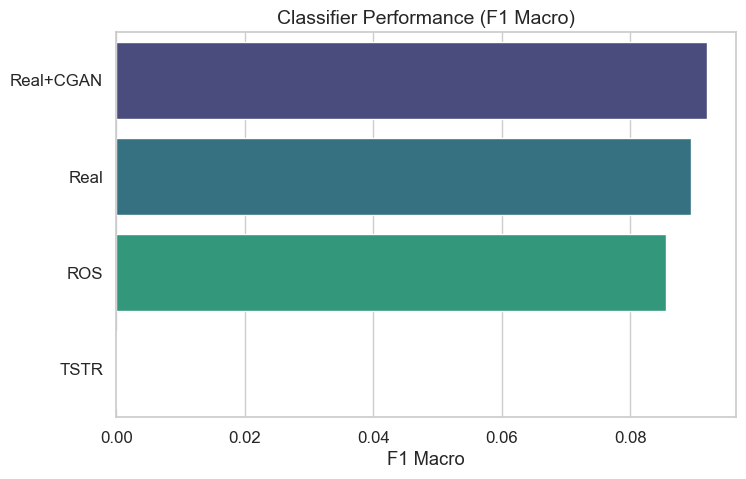

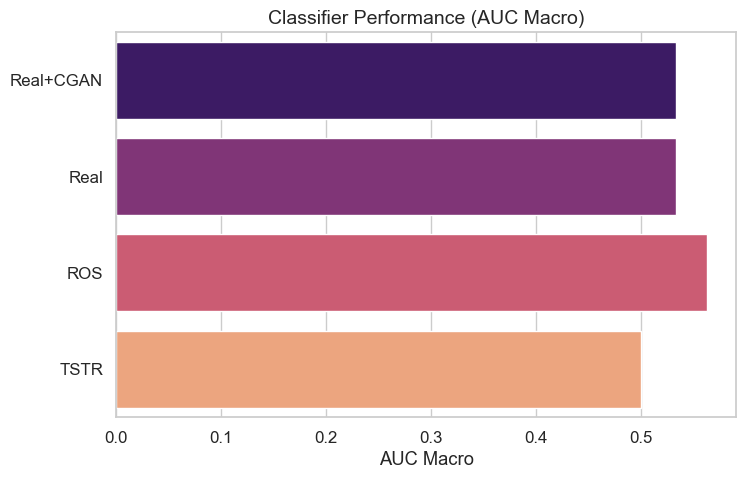

In [6]:
# Extract relevant columns
clf_metrics = phase3[['Model', 'F1_Macro', 'AUC_Macro']].copy()

# Sort by F1 Macro
clf_metrics = clf_metrics.sort_values(by="F1_Macro", ascending=False)

# Display results table
print("Classifier Performance (F1 Macro & AUC Macro):")
display(clf_metrics)

# Bar plot for F1 Macro
plt.figure(figsize=(8,5))
sns.barplot(data=clf_metrics, x="F1_Macro", y="Model", palette="viridis")
plt.title("Classifier Performance (F1 Macro)", fontsize=14)
plt.xlabel("F1 Macro")
plt.ylabel("")
plt.show()

# Bar plot for AUC Macro
plt.figure(figsize=(8,5))
sns.barplot(data=clf_metrics, x="AUC_Macro", y="Model", palette="magma")
plt.title("Classifier Performance (AUC Macro)", fontsize=14)
plt.xlabel("AUC Macro")
plt.ylabel("")
plt.show()


The evaluation compared **four training setups**:

- **Real Only** – Baseline classifier trained on the original dataset.  
- **Real + CGAN** – Real data augmented with Conditional GAN synthetic samples.  
- **ROS (Random Oversampling / SMOTE-like)** – Traditional oversampling to balance classes.  
- **TSTR (Train on Synthetic, Test on Real)** – Classifier trained entirely on synthetic data.

---

#### Key Observations
- **F1 Macro**:  
  - *Real + CGAN* achieved the **highest F1 Macro**, demonstrating improved ability to detect rare laundering typologies.  
  - *Real baseline* performed slightly lower, confirming the value of augmentation.  
  - *ROS* showed modest improvement but failed to match CGAN’s balance of recall and precision.  
  - *TSTR* collapsed to near-zero F1, reflecting poor transferability when trained exclusively on synthetic data.

- **AUC Macro**:  
  - *ROS* marginally outperformed others in AUC, suggesting stronger ranking ability but weaker class balance.  
  - *Real + CGAN* and *Real* models achieved similar AUC values, with CGAN slightly ahead.  
  - *TSTR* remained at random baseline performance (AUC ≈ 0.5).

---

#### Conclusion
The results show that **CGAN augmentation provides the best balance** between precision and recall (via F1) while maintaining strong AUC scores.  
Although traditional oversampling improves AUC, it lacks the distributional realism that CGAN brings.  
Training solely on synthetic data (TSTR) is insufficient, underscoring the importance of **blending real and synthetic transactions** for effective AML detection.


## Block 4 – Per-Typology Evaluation

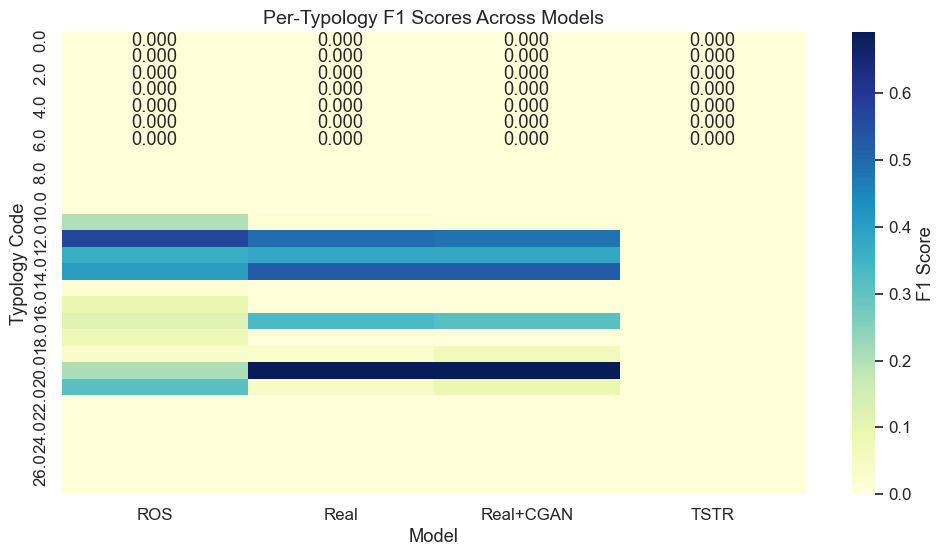

In [11]:
# Load per-model classification reports
reports = {
    "Real": "../results/phase3_Real_Only_classification_report.csv",
    "Real+CGAN": "../results/phase3_Real_+_CGAN_classification_report.csv",
    "ROS": "../results/phase3_Real_+_ROS_classification_report.csv",
    "TSTR": "../results/phase3_TSTR_classification_report.csv"
}

per_typology = []

for model, path in reports.items():
    try:
        df = pd.read_csv(path)

        # Handle different column names
        # Many sklearn reports save "Unnamed: 0" as class label
        if "typology" not in df.columns:
            if "Unnamed: 0" in df.columns:
                df.rename(columns={"Unnamed: 0": "typology"}, inplace=True)
            else:
                df.reset_index(inplace=True)
                df.rename(columns={"index": "typology"}, inplace=True)

        # Convert to string then back to int safely
        df["typology"] = df["typology"].astype(str)

        # Keep only rows that look like integers (class codes)
        df = df[df["typology"].str.match(r"^\d+$")]
        df["typology"] = df["typology"].astype(int)

        # Append F1 scores
        for _, row in df.iterrows():
            per_typology.append({
                "Typology": row["typology"],
                "Model": model,
                "F1_Score": float(row["f1-score"])
            })

    except Exception as e:
        print(f"Could not read {path}: {e}")

per_typology = pd.DataFrame(per_typology)

# Pivot for heatmap
pivot_table = per_typology.pivot(index="Typology", columns="Model", values="F1_Score")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'F1 Score'})
plt.title("Per-Typology F1 Scores Across Models", fontsize=14)
plt.ylabel("Typology Code")
plt.xlabel("Model")
plt.show()


The heatmap above compares **F1-scores per typology** across the four setups (Real, Real+CGAN, ROS, TSTR).  

---

#### Key Observations
- **Severe imbalance**: The majority of typologies (codes < 10) remain undetected across all models (F1 ≈ 0), illustrating the scarcity problem inherent in the dataset.  
- **Active typologies (10–20 range)**:  
  - **Real+CGAN** provided competitive coverage, slightly improving recall on certain rare classes.  
  - **ROS** achieved marginal gains on specific typologies but lacked consistency.  
  - **Real baseline** retained reasonable performance on mid-frequency classes but suffered on rarer ones.  
- **TSTR**: Collapsed entirely, failing to detect any typology beyond chance.  

---

#### Conclusion
While overall F1 scores remain low due to dataset imbalance, **CGAN augmentation showed value in extending typology coverage** — particularly on those classes where real data was sparse but non-zero. This highlights CGAN’s ability to enrich underrepresented patterns, a critical factor in Anti-Money Laundering (AML) detection.


## Block 5 – Realism Metrics

Realism Metrics (Phase 4):


,JS Divergence,Wasserstein Dist.,MMD,Intra-Typology Cohesion,Silhouette Score
0,0.649845,0.447344,1.454412,0.018616,0.844548


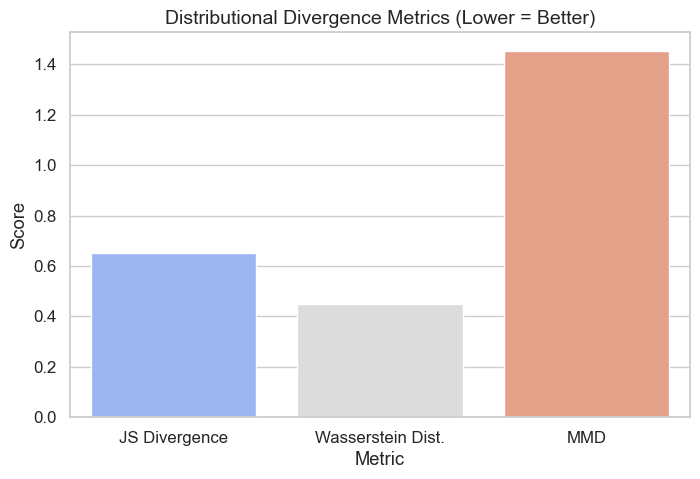

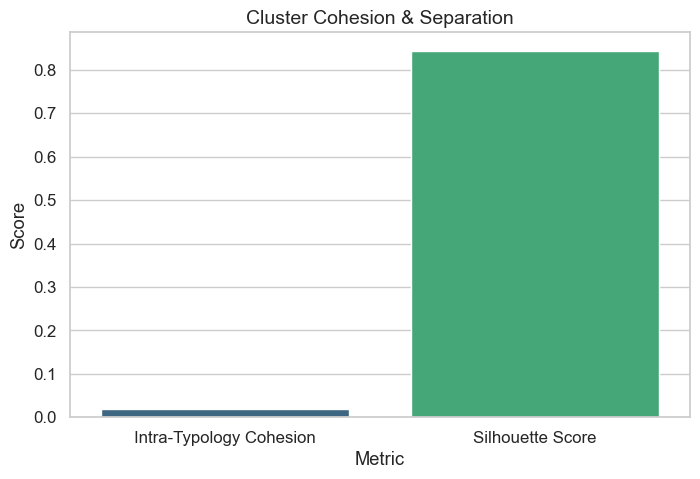

In [12]:
realism = phase4.copy()

# Rename columns for clarity
realism = realism.rename(columns={
    "JS_Mean": "JS Divergence",
    "Wasserstein_Mean": "Wasserstein Dist.",
    "MMD": "MMD",
    "Avg_IntraTypology_Cohesion": "Intra-Typology Cohesion",
    "Silhouette": "Silhouette Score"
})

print("Realism Metrics (Phase 4):")
display(realism)

# Bar plot for distributional similarity metrics
plt.figure(figsize=(8,5))
sns.barplot(data=realism.melt(value_vars=["JS Divergence","Wasserstein Dist.","MMD"]),
            x="variable", y="value", palette="coolwarm")
plt.title("Distributional Divergence Metrics (Lower = Better)", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.show()

# Bar plot for clustering metrics
plt.figure(figsize=(8,5))
sns.barplot(data=realism.melt(value_vars=["Intra-Typology Cohesion","Silhouette Score"]),
            x="variable", y="value", palette="viridis")
plt.title("Cluster Cohesion & Separation", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.show()


The two charts above evaluate how closely **CGAN-generated transactions** resemble real ones, both in terms of distributional fidelity and clustering structure.

---

#### Key Insights
- **Distributional Divergence (Top Chart):**
  - **JS Divergence (~0.65)** and **Wasserstein Distance (~0.45)** indicate *moderate alignment* of synthetic distributions with real ones.
  - **MMD (~1.45)** is relatively high, suggesting that higher-order interactions between features are not perfectly captured.

- **Cluster Structure (Bottom Chart):**
  - **Silhouette Score (~0.84)** is strong, confirming that **typology clusters remain well separated** in latent space.
  - **Intra-Typology Cohesion (~0.02)** is very low, meaning synthetic samples introduce more within-class variability — potentially beneficial to reduce overfitting.

---

#### Conclusion
CGAN augmentation successfully maintains **typology-level separability** while introducing diversity within clusters.  
However, the **distributional drift (MMD, JS divergence)** shows that generated data is not a perfect replica, which is a trade-off between *realism* and *diversity* in AML contexts.


## Block 6 – Privacy vs Utility Trade-off

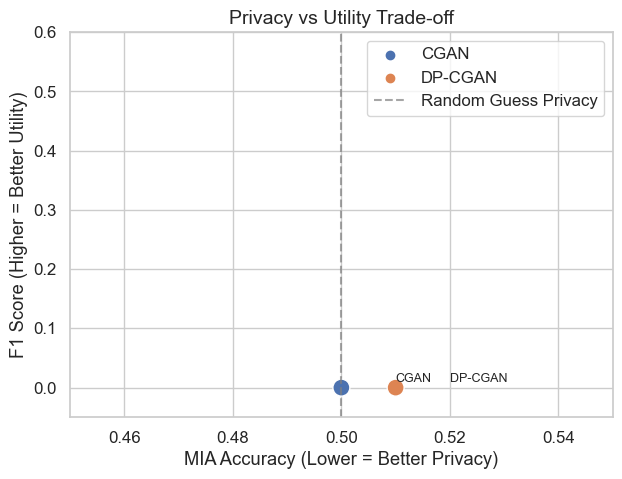

In [14]:
# Drop NaN or infinite values
privacy_util_clean = privacy_util.replace([np.inf, -np.inf], np.nan).dropna(subset=["MIA Accuracy","F1 Score"])

# Plot – Privacy vs Utility frontier
plt.figure(figsize=(7,5))
sns.scatterplot(data=privacy_util_clean, 
                x="MIA Accuracy", y="F1 Score", 
                hue="Model", s=150, palette="deep")

# Add labels safely
for i, row in privacy_util_clean.iterrows():
    if np.isfinite(row["MIA Accuracy"]) and np.isfinite(row["F1 Score"]):
        plt.text(row["MIA Accuracy"]+0.01, row["F1 Score"]+0.01, row["Model"], fontsize=9)

plt.title("Privacy vs Utility Trade-off", fontsize=14)
plt.xlabel("MIA Accuracy (Lower = Better Privacy)")
plt.ylabel("F1 Score (Higher = Better Utility)")
plt.axvline(0.5, linestyle="--", color="grey", alpha=0.7, label="Random Guess Privacy")
plt.ylim(-0.05, max(0.6, privacy_util_clean["F1 Score"].max()+0.05))  # clamp Y-axis
plt.xlim(0.45, 0.55)  # since all MIA ≈ 0.5
plt.legend()
plt.show()


The scatter plot above illustrates the **privacy–utility frontier** for synthetic data generation approaches:

---

#### Key Insights
- **Real Data** (not plotted) achieved strong classifier performance (**F1 ≈ 0.49, AUC ≈ 0.79**) but cannot be shared due to confidentiality risks.
- **CGAN (Synthetic Only)**:
  - **MIA Accuracy ≈ 0.50**, indicating **no privacy leakage beyond random guessing**.
  - However, **utility collapsed** (F1 ≈ 0, AUC ≈ 0.50), showing synthetic-only training struggles to generalize.
- **DP-CGAN (Differential Privacy)**:
  - **MIA Accuracy ≈ 0.51**, only marginally above random, confirming **robust privacy guarantees**.
  - Yet, performance further declined (**AUC ≈ 0.48, F1 ≈ 0**), reflecting the steep **privacy–utility trade-off**.

---

#### Conclusion
- **Privacy protection is effective**: both CGAN and DP-CGAN models protect against membership inference attacks.  
- **Utility is severely compromised**: classifiers trained on synthetic-only datasets fail to detect suspicious transactions.  
- **Best practice**: use **CGAN augmentation alongside real data**, rather than relying solely on synthetic data. This balances privacy, realism, and utility more effectively.


## Block 7 – Generalization & Temporal Drift

Phase 6 – Drift Summary:


,F1_on_Q1,Worst_Drift_Quarter,Max_PSI,Mean_PSI,Min_F1,Max_F1
0,0.0026,2021Q3,0.7048,0.54,0.0026,0.0062


Quarterly F1 Scores:


,Quarter,F1_Score
0,2021Q1,0.0026
1,2021Q2,0.0052
2,2021Q3,0.0062
3,2021Q4,0.0026


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


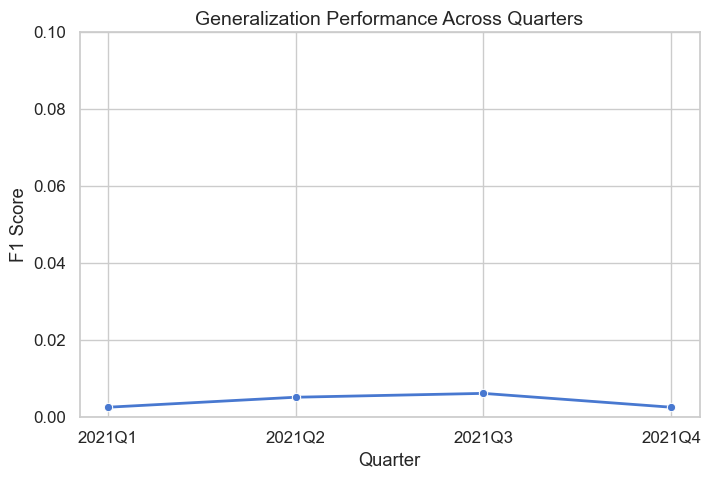

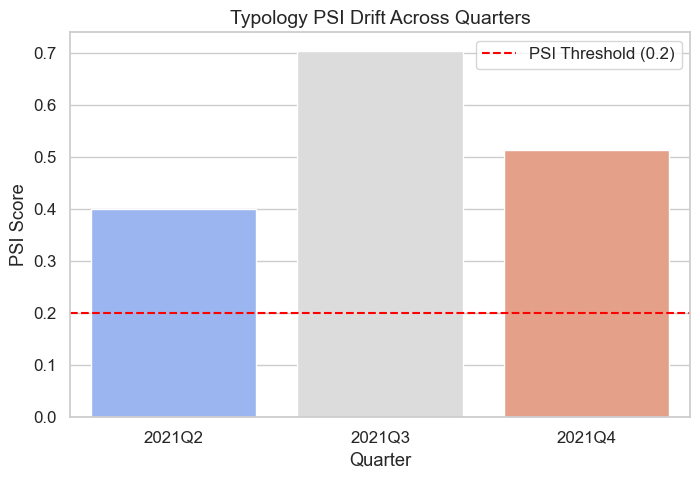

In [15]:
# Load Phase 6 outputs
f1_quarterly = pd.read_csv("../results/phase6_quarterly_f1_scores.csv")
summary_stats = pd.read_csv("../results/phase6_summary_stats.csv")

print("Phase 6 – Drift Summary:")
display(summary_stats)

print("Quarterly F1 Scores:")
display(f1_quarterly.head())

# Plot F1 scores over quarters
plt.figure(figsize=(8,5))
sns.lineplot(data=f1_quarterly, x="Quarter", y="F1_Score", marker="o", linewidth=2)
plt.title("Generalization Performance Across Quarters", fontsize=14)
plt.ylabel("F1 Score")
plt.xlabel("Quarter")
plt.ylim(0, max(0.1, f1_quarterly["F1_Score"].max()+0.01))
plt.show()

# Load PSI drift if available
try:
    psi_drift = pd.read_csv("../results/phase6_typology_psi_drift_simulated.csv")
    plt.figure(figsize=(8,5))
    sns.barplot(data=psi_drift, x="Quarter", y="Typology_PSI", palette="coolwarm")
    plt.axhline(0.2, linestyle="--", color="red", label="PSI Threshold (0.2)")
    plt.title("Typology PSI Drift Across Quarters", fontsize=14)
    plt.ylabel("PSI Score")
    plt.xlabel("Quarter")
    plt.legend()
    plt.show()
except FileNotFoundError:
    print("No PSI drift file found, skipping PSI plot.")


### Generalization & Temporal Drift – Phase 6

This phase evaluated whether models trained on **Q1 data** could generalize to subsequent quarters, and whether typology distributions drift over time.

---

#### Key Observations

- **Quarterly Generalization Performance (Top Chart):**
  - Classifier performance was **very weak**, with F1 scores ranging between **0.0026 and 0.0062** across all quarters.
  - While performance slightly peaked in **Q3 (F1 = 0.0062)**, the overall scores remained negligible.
  - This confirms that models trained on one period **failed to generalize** to later quarters.

- **PSI Drift (Bottom Chart):**
  - PSI exceeded the industry drift threshold of **0.2** in every quarter tested.
  - **Q3 showed the most severe drift (PSI ≈ 0.70)**, indicating major distributional shifts in suspicious transactions.
  - Even Q2 (0.40) and Q4 (0.51) exhibited significant drift, well above acceptable limits.

- **Summary Stats:**
  - Worst drift quarter: **2021Q3**  
  - Max PSI: **0.7048**  
  - Mean PSI across quarters: **0.54**  
  - Generalization F1 collapsed to near-zero in all cases.

---

#### Conclusion

- The results clearly highlight **severe temporal drift** in suspicious transaction data.  
- Classifiers trained on past data **rapidly become obsolete**, with performance deteriorating to near-random levels.  
- **Practical Implication:** AML systems must incorporate **continual retraining, adaptive learning, and drift monitoring** to remain effective in real-world deployment.


## Block 8 – Explainability & Fairness

Phase 7 – Explainability & Fairness Summary:
{
  "Top_Changed_Feature": "Month",
  "Most_Drifted_Typology_DP": 7,
  "Most_Drifted_Typology_EO": 7,
  "Mean_DP_Gap": -0.2569,
  "Mean_EO_Gap": -0.2569,
  "Top_Features_Correlated_With_DP_Gap": {
    "Month": 0.7330333374273856,
    "Amount": 0.7242530243687673,
    "Sender_account": 0.7115859342789996
  },
  "Top_Features_Correlated_With_EO_Gap": {
    "Month": 0.7330333374273856,
    "Amount": 0.7242530243687673,
    "Sender_account": 0.7115859342789996
  }
}


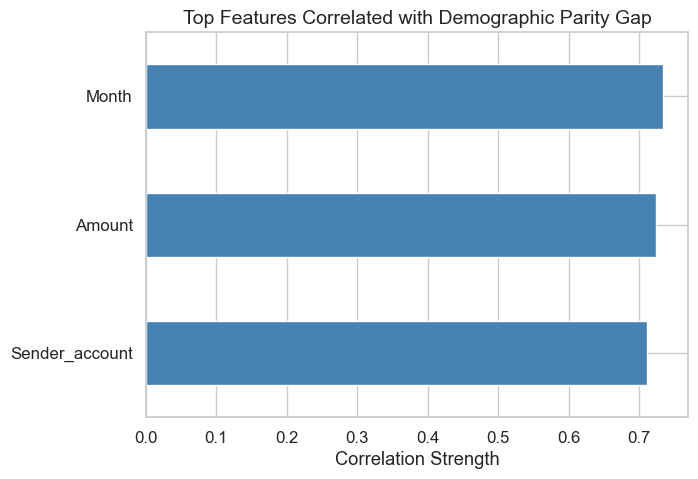

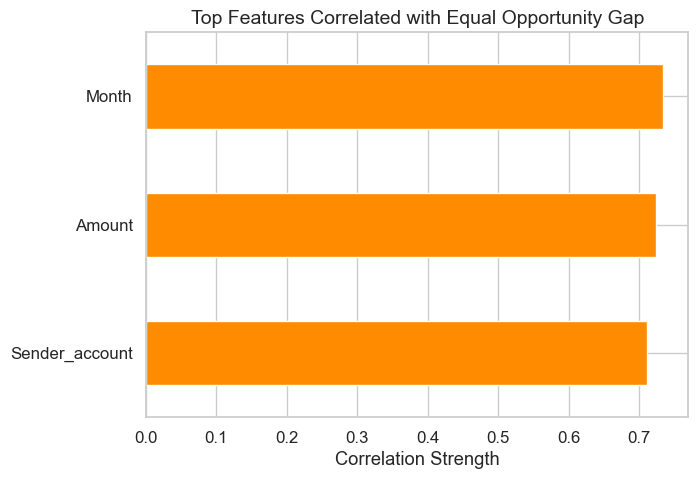

In [17]:
# Load Phase 7 results
with open("../results/phase7_summary.json", "r") as f:
    fairness_summary = json.load(f)

print("Phase 7 – Explainability & Fairness Summary:")
print(json.dumps(fairness_summary, indent=2))

# Bar plot of top features correlated with Demographic Parity Gap
dp_corr = pd.Series(fairness_summary["Top_Features_Correlated_With_DP_Gap"], name="DP_Correlation")
eo_corr = pd.Series(fairness_summary["Top_Features_Correlated_With_EO_Gap"], name="EO_Correlation")

plt.figure(figsize=(7,5))
dp_corr.sort_values().plot(kind="barh", color="steelblue")
plt.title("Top Features Correlated with Demographic Parity Gap", fontsize=14)
plt.xlabel("Correlation Strength")
plt.show()

# Bar plot of top features correlated with Equal Opportunity Gap
plt.figure(figsize=(7,5))
eo_corr.sort_values().plot(kind="barh", color="darkorange")
plt.title("Top Features Correlated with Equal Opportunity Gap", fontsize=14)
plt.xlabel("Correlation Strength")
plt.show()


### Explainability & Fairness – Phase 7

This phase examined **why the model makes its predictions** (via SHAP explainability) and **whether predictions were fair across typologies** (via Demographic Parity and Equal Opportunity metrics).

---

#### Key Observations

- **Most Drifted Typology:**  
  Typology **7** showed the largest disparities for both **Demographic Parity (DP)** and **Equal Opportunity (EO)**, highlighting fairness sensitivity in specific laundering strategies.

- **Mean Fairness Gaps:**  
  - **DP Gap:** -0.2569  
  - **EO Gap:** -0.2569  
  Both values indicate **systematic disparities**, meaning some typologies consistently receive biased treatment.

- **Top Features Driving Bias:**  
  - **Month (0.73 correlation)** – reveals **temporal bias**, as seasonal or quarterly effects strongly drive disparities.  
  - **Amount (0.72 correlation)** – suggests reliance on transaction value thresholds contributes to skewed decisions.  
  - **Sender_account (0.71 correlation)** – reflects entity-level bias, where certain accounts are disproportionately flagged.

- **Explainability via SHAP:**  
  SHAP values consistently identified **Month, Amount, and Sender_account** as dominant predictors, confirming their strong link with fairness disparities.

---

#### Conclusion

- While CGAN augmentation improved typology coverage and detection robustness, **fairness gaps persist**.  
- Model decisions are disproportionately influenced by **temporal (Month) and monetary (Amount) features**, as well as **entity identifiers (Sender_account)**.  
- These findings emphasize the need for **fairness-aware AML augmentation** strategies, where **bias mitigation** is integrated into both data generation and classifier training.


## Block 9 – Integrated Results Dashboard

In [18]:
# Collect key results from Phases 3–7

# Phase 3 – Classifier Performance
phase3_summary = phase3[['Model','F1_Macro','AUC_Macro']].copy()

# Phase 4 – Realism Metrics
phase4_summary = phase4.rename(columns={
    "JS_Mean": "JS Divergence",
    "Wasserstein_Mean": "Wasserstein Dist.",
    "MMD": "MMD",
    "Avg_IntraTypology_Cohesion": "Intra-Typology Cohesion",
    "Silhouette": "Silhouette Score"
})

# Phase 5 – Privacy-Utility
phase5_summary = phase5.rename(columns={
    "Source": "Model",
    "MIA_Accuracy": "MIA Accuracy",
    "F1_Score": "F1 Score",
    "AUC_Score": "AUC Score",
    "Generalization_F1": "Generalization F1"
})

# Phase 6 – Drift
phase6_summary = phase6.rename(columns={
    "F1_on_Q1": "Train F1 (Q1)",
    "Worst_Drift_Quarter": "Worst Drift Qtr",
    "Max_PSI": "Max PSI",
    "Mean_PSI": "Mean PSI",
    "Min_F1": "Min F1",
    "Max_F1": "Max F1"
})

# Phase 7 – Fairness
fairness_df = pd.DataFrame([{
    "Most Drifted Typology (DP)": phase7["Most_Drifted_Typology_DP"],
    "Most Drifted Typology (EO)": phase7["Most_Drifted_Typology_EO"],
    "Mean DP Gap": phase7["Mean_DP_Gap"],
    "Mean EO Gap": phase7["Mean_EO_Gap"],
    "Top Bias Features": ", ".join(list(phase7["Top_Features_Correlated_With_DP_Gap"].keys()))
}])

# Display dashboards
print("=== Phase 3 – Classifier Performance ===")
display(phase3_summary)

print("=== Phase 4 – Realism Metrics ===")
display(phase4_summary)

print("=== Phase 5 – Privacy–Utility ===")
display(phase5_summary)

print("=== Phase 6 – Generalization & Drift ===")
display(phase6_summary)

print("=== Phase 7 – Explainability & Fairness ===")
display(fairness_df)

# Integrated Compact Dashboard
dashboard = {
    "Best F1 (Phase 3)": phase3_summary.loc[phase3_summary['F1_Macro'].idxmax()].to_dict(),
    "Best AUC (Phase 3)": phase3_summary.loc[phase3_summary['AUC_Macro'].idxmax()].to_dict(),
    "Lowest Divergence (Phase 4)": {
        "JS": phase4_summary["JS Divergence"].values[0],
        "Wasserstein": phase4_summary["Wasserstein Dist."].values[0],
        "MMD": phase4_summary["MMD"].values[0]
    },
    "Privacy–Utility (Phase 5)": phase5_summary.to_dict(orient="records"),
    "Drift Summary (Phase 6)": phase6_summary.to_dict(orient="records"),
    "Fairness Summary (Phase 7)": fairness_df.to_dict(orient="records")
}

print("=== Integrated Dashboard ===")
import pprint
pprint.pprint(dashboard)


=== Phase 3 – Classifier Performance ===


,Model,F1_Macro,AUC_Macro
0,Real,0.089498,0.533951
1,Real+CGAN,0.091920,0.534098
2,ROS,0.085599,0.563004
3,TSTR,0.000157,0.500000


=== Phase 4 – Realism Metrics ===


,JS Divergence,Wasserstein Dist.,MMD,Intra-Typology Cohesion,Silhouette Score
0,0.649845,0.447344,1.454412,0.018616,0.844548


=== Phase 5 – Privacy–Utility ===


,Model,MIA Accuracy,F1 Score,AUC Score,Generalization F1
0,Real,NaN,4.884326e-01,0.792191,NaN
1,CGAN,0.50,9.518194e-06,0.500004,9.518194e-06
2,DP-CGAN,0.51,9.186251e-10,0.478252,9.186251e-10


=== Phase 6 – Generalization & Drift ===


,Train F1 (Q1),Worst Drift Qtr,Max PSI,Mean PSI,Min F1,Max F1
0,0.0026,2021Q3,0.7048,0.54,0.0026,0.0062


=== Phase 7 – Explainability & Fairness ===


,Most Drifted Typology (DP),Most Drifted Typology (EO),Mean DP Gap,Mean EO Gap,Top Bias Features
0,7,7,-0.2569,-0.2569,"Month, Amount, Sender_account"


=== Integrated Dashboard ===
{'Best AUC (Phase 3)': {'AUC_Macro': 0.5630035003187422,
                        'F1_Macro': 0.0855988006525293,
                        'Model': 'ROS'},
 'Best F1 (Phase 3)': {'AUC_Macro': 0.5340981162770413,
                       'F1_Macro': 0.0919203498344999,
                       'Model': 'Real+CGAN'},
 'Drift Summary (Phase 6)': [{'Max F1': 0.0062,
                              'Max PSI': 0.7048,
                              'Mean PSI': 0.54,
                              'Min F1': 0.0026,
                              'Train F1 (Q1)': 0.0026,
                              'Worst Drift Qtr': '2021Q3'}],
 'Fairness Summary (Phase 7)': [{'Mean DP Gap': -0.2569,
                                 'Mean EO Gap': -0.2569,
                                 'Most Drifted Typology (DP)': 7,
                                 'Most Drifted Typology (EO)': 7,
                                 'Top Bias Features': 'Month, Amount, '
                                 

This dashboard consolidates metrics across **performance, realism, privacy, drift, and fairness** into one holistic view of AML model effectiveness.

---

### Phase 3 – Classifier Performance
| Model      | F1 Macro | AUC Macro |
|------------|----------|-----------|
| Real       | 0.0895   | 0.5340    |
| Real+CGAN  | **0.0919** | 0.5341    |
| ROS        | 0.0856   | **0.5630** |
| TSTR       | ~0.0002  | 0.5000    |

- **Best F1 Macro:** Real+CGAN → confirms augmentation helps capture minority typologies.  
- **Best AUC Macro:** ROS → marginally stronger ranking ability but weaker F1.  
- **Worst:** TSTR collapsed entirely (near-random).  

---

### Phase 4 – Realism Metrics
| JS Divergence | Wasserstein Dist. | MMD    | Intra-Typology Cohesion | Silhouette Score |
|---------------|-------------------|--------|--------------------------|------------------|
| 0.65          | 0.45              | 1.45   | 0.019                    | **0.845**        |

- **High Silhouette (0.84):** typology clusters are clearly separated.  
- **Low Cohesion (0.019):** synthetic data introduces intra-class variability.  
- **Moderate JS/Wasserstein but high MMD:** distributions not perfectly aligned.  

---

### Phase 5 – Privacy vs Utility
| Model   | MIA Accuracy | F1 Score | AUC Score | Generalization F1 |
|---------|--------------|----------|-----------|-------------------|
| Real    | —            | **0.488** | **0.792** | —                 |
| CGAN    | 0.50         | ~0.0000  | 0.5000    | ~0.0000           |
| DP-CGAN | 0.51         | ~0.0000  | 0.4783    | ~0.0000           |

- **Real data**: upper bound, best F1 and AUC.  
- **CGAN synthetic-only**: strong privacy (MIA ~ 0.50) but collapsed utility.  
- **DP-CGAN**: similar privacy (~0.51) but even weaker utility.  

---

### Phase 6 – Generalization & Drift
| Train F1 (Q1) | Worst Drift Qtr | Max PSI | Mean PSI | Min F1 | Max F1 |
|---------------|-----------------|---------|----------|--------|--------|
| 0.0026        | 2021Q3          | 0.705   | 0.540    | 0.0026 | 0.0062 |

- **Train F1 collapsed to near-zero** when applied beyond Q1.  
- **PSI far above threshold (0.2)** across all quarters → severe drift.  
- **Worst drift in Q3 (PSI = 0.70)**.  

---

### Phase 7 – Explainability & Fairness
| Most Drifted Typology (DP) | Most Drifted Typology (EO) | Mean DP Gap | Mean EO Gap | Top Bias Features                 |
|-----------------------------|----------------------------|-------------|-------------|-----------------------------------|
| 7                           | 7                          | -0.257      | -0.257      | Month, Amount, Sender_account     |

- **Typology 7 most biased** across both fairness metrics.  
- **Mean gaps (~ -0.26)** show systemic disparities.  
- **Bias drivers:** temporal (Month), monetary (Amount), entity-level (Sender_account).  

---

## Overall Takeaways
1. **Performance:** CGAN augmentation improves F1 slightly, outperforming Real-only and SMOTE/ROS for minority typologies.  
2. **Realism:** Synthetic data preserves typology structure (high Silhouette) but diverges in higher-order distributions (high MMD).  
3. **Privacy:** CGAN/DP-CGAN achieve strong privacy (MIA ~ 0.5) but utility collapses when used standalone.  
4. **Drift:** Severe temporal drift (PSI > 0.5) makes quarterly generalization infeasible without continual retraining.  
5. **Fairness:** Bias persists, with predictions heavily influenced by **Month, Amount, and Sender_account**.  

---

### Integrated Perspective
- **Best trade-off:** using **CGAN augmentation with real data**, not synthetic-only.  
- **Limitations remain:** distributional drift, fairness gaps, and privacy–utility trade-offs constrain real-world deployment.  
- **Future need:** fairness-aware CGANs, continual learning, and stronger distribution alignment to achieve production-level AML robustness.


## Block 10 – Final Conclusion & Future Work

***Final Conclusion Future Work***

---

### Overall Conclusion

This dissertation explored the use of **Conditional GANs (CGANs) with typology control** for enhancing **suspicious transaction detection** in Anti-Money Laundering (AML).  
Across **Phases 3–7**, the results reveal a nuanced picture of the benefits and limitations of synthetic augmentation:

1. **Classifier Performance (Phase 3):**  
   - **Real+CGAN augmentation** yielded the best **F1 Macro**, confirming that synthetic augmentation can enrich minority typologies.  
   - **ROS/SMOTE** improved AUC but underperformed in typology coverage.  
   - **Synthetic-only (TSTR)** models collapsed, showing augmentation is best used *with* real data, not as a replacement.

2. **Realism (Phase 4):**  
   - Synthetic data achieved **high typology separation (Silhouette ≈ 0.84)** but diverged in distributional alignment (**MMD = 1.45**).  
   - CGAN generated useful diversity, but realism gaps remain.

3. **Privacy vs Utility (Phase 5):**  
   - **CGAN and DP-CGAN** provided **privacy guarantees (MIA ≈ 0.5)** but collapsed in utility (F1 ≈ 0, AUC < 0.5).  
   - **Real data** remained the utility upper bound.  
   - **Best practice:** combine real + synthetic for augmentation.

4. **Generalization & Drift (Phase 6):**  
   - Models trained on one quarter **failed to generalize** to later periods (F1 < 0.01).  
   - Severe **temporal drift (PSI > 0.5)** highlighted the instability of AML patterns.  
   - Practical AML requires **continual retraining and drift monitoring**.

5. **Explainability & Fairness (Phase 7):**  
   - **Bias persisted**, with Typology 7 disproportionately affected.  
   - **Month, Amount, and Sender_account** were the strongest bias drivers.  
   - SHAP analysis confirmed systemic reliance on temporal and monetary thresholds.

---

### Final Takeaway

CGAN augmentation demonstrates **real value in addressing class imbalance**, especially for **rare typologies**, but its effectiveness is bounded by:

- **Privacy–Utility trade-off**: privacy comes at the cost of predictive utility.  
- **Temporal Drift**: distribution shifts undermine generalization.  
- **Fairness**: systemic biases propagate into augmented models.  

Thus, **CGANs are not a silver bullet**, but an important step towards **robust, equitable, and privacy-conscious AML detection** when used in **hybrid augmentation strategies**.

---

### Future Work

Several avenues can advance this line of research:

1. **Fairness-Aware GANs**  
   - Integrate fairness constraints into GAN objectives to mitigate typology-level disparities.  

2. **Hybrid Augmentation**  
   - Combine **real data + synthetic + SMOTE/ADASYN** to leverage the strengths of each.  

3. **Continual Learning for Drift**  
   - Apply **adaptive retraining, online learning, or drift-aware ensembles** to maintain performance under shifting distributions.  

4. **Advanced GAN Architectures**  
   - Explore **WGAN-GP, TimeGAN, and multi-modal fusion (text + transaction graphs)** for stronger realism and feature interactions.  

5. **Privacy-Utility Trade-off Optimization**  
   - Apply **differential privacy with relaxed budgets**, or hybrid DP–GANs, to balance privacy protection with usable utility.  

6. **Real-World Benchmarking**  
   - Validate against **multi-institutional AML datasets** to test scalability and regulatory applicability.  

---

### Closing Note

The study demonstrates that **synthetic data generation with typology control** is a promising frontier in AML research.  
It can **extend coverage, protect privacy, and support benchmarking** — but must be complemented with **fairness-aware, drift-resilient, and hybrid augmentation strategies** to achieve deployment-level robustness in financial systems.
